#### <center>Intermediate Python and Software Enginnering</center>


## <center>Section 06 - Matplotlib and Numpy - Exercise Solutions</center>


### <center>Innovation Scholars Programme</center>
### <center>King's College London, Medical Research Council and UKRI <center>

### Exercise 2.1:
The `mgrid` object in Numpy gives up a mesh grid of values for given dimensions. We can use the values it produces to draw an image with each pixel representing the distance that pixel is from the image center. Use your Numpy skills to calculate this 2D image and draw it with Matplotlib:

[-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
   3   4   5   6   7   8   9  10  11  12  13  14]


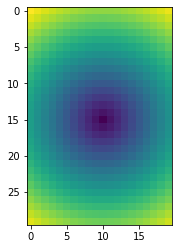

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


y,x=np.mgrid[-15:15,-10:10]

print(y[:,0])

plt.imshow(np.sqrt(x**2+y**2))

### Exercise 2.2:
Let's bring back the cat:

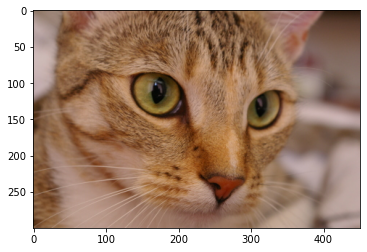

In [6]:
im = plt.imread('chelsea.png')
plt.imshow(im)

As we know this image has red, green, and blue channels. There aren't terribly distinct as there isn't bright colours in the image but they are different. We can convert to a proper greyscale by summing the channels after multiplying by weights, for example the weights for sRGB conversion are `0.2126, 0.7152, 0.0722`. Use these values to scale the channels to produce a greyscale version of the picture, and draw this in a four part image with the other channels intepreted as grey themselves:

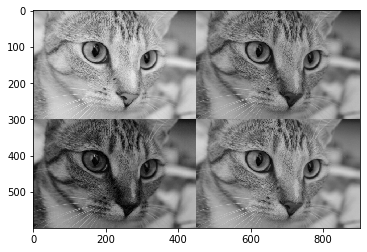

In [3]:
g = im @ np.array([0.2126, 0.7152, 0.0722])
plt.imshow(np.vstack([np.hstack([im[...,0],im[...,1]]),np.hstack([im[...,2],g])]),cmap='gray')

### Exercise 2.3:
We haven't touched on Scipy yet but we'll use a few routines from its `ndimage` module. Scipy is a collection of many mathematical functions for interpolation, integration, optimization, linear algebra, statistics, signal processing, and some image manipulation.

Let's import `ndimage`:

In [4]:
import scipy.ndimage as ndimage

There is a function called [correlate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.correlate.html#scipy.ndimage.correlate) in this module for correlating a 2D image with a kernel. This allows us to define filters for images. Use this function to implement the [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator) and apply it to the cat's red channel.

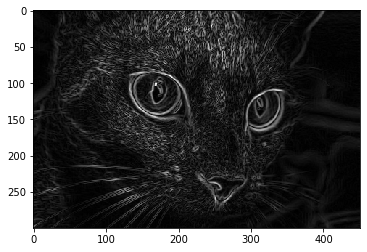

In [5]:
# edge-detected cat here
x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
y=x.T

cx=ndimage.correlate(im[...,0],x)
cy=ndimage.correlate(im[...,0],y)
plt.imshow(np.sqrt(cx**2+cy**2),cmap='gray')

## Boston House Prices Dataset

We will be using the Boston house prices dataset (1,2) for this exercise which is used for various machine learning examples. This is given to you in a `boston.csv` file which stores a table of numbers with the following columns:

 * CRIM - per capita crime rate by town
 * ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
 * INDUS - proportion of non-retail business acres per town.
 * CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 * NOX - nitric oxides concentration (parts per 10 million)
 * RM - average number of rooms per dwelling
 * AGE - proportion of owner-occupied units built prior to 1940
 * DIS - weighted distances to five Boston employment centres
 * RAD - index of accessibility to radial highways
 * TAX - full-value property-tax rate per \$10,000
 * PTRATIO - pupil-teacher ratio by town
 * LSTAT - \% lower status of the population
 * MEDV - Median value of owner-occupied homes in $1000's
 
(1) Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

(2) Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.
 
 
 We'll import this data using Pandas:

In [31]:
import pandas as pd

df=pd.read_csv('boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


We can get the pairwise correlation matrix automatically with this call:

In [22]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


### Exercise 2.4:
This is hard to digest just as a table so figure out a way with Matplotlib to render this in a more understandable form (start with `plt.imshow` maybe?). Sorting the columns in some way to group correlated values might help.

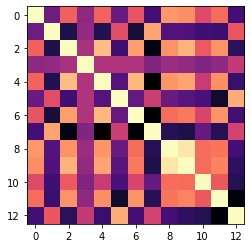

In [23]:
plt.imshow(df.corr(),cmap='magma')

### Exercise 2.5:
Display a histogram of the house prices with 20 bins (hint: `plt.hist`):

(array([ 9., 12., 18., 37., 40., 42., 83., 71., 72., 12., 23., 18., 16.,
        14.,  7.,  1.,  5.,  5.,  2., 19.]),
 array([ 5.  ,  7.25,  9.5 , 11.75, 14.  , 16.25, 18.5 , 20.75, 23.  ,
        25.25, 27.5 , 29.75, 32.  , 34.25, 36.5 , 38.75, 41.  , 43.25,
        45.5 , 47.75, 50.  ]),
 <a list of 20 Patch objects>)

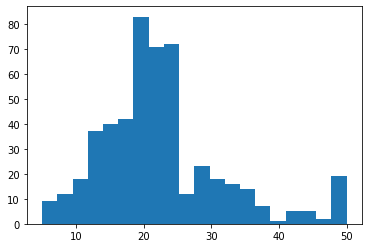

In [24]:
plt.hist(df['MEDV'],20)

The RAD value has a maximum value of 24 to indicate out-of-band data.

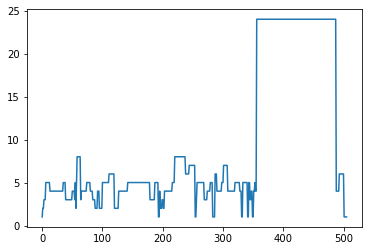

In [25]:
plt.plot(df['RAD'])

### Exercise 2.6:
Convert the RAD column to a numpy array, replace all 24 values with 0, and replot:

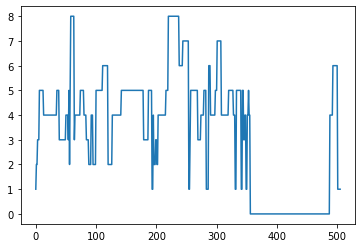

In [26]:
rad1=np.array(df['RAD'])
rad1[rad1==rad1.max()]=0

plt.plot(rad1)

### Exercise 2.7:
Plot a scatter plot with x as `AGE` and y as `DIS` ([scatter documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)):

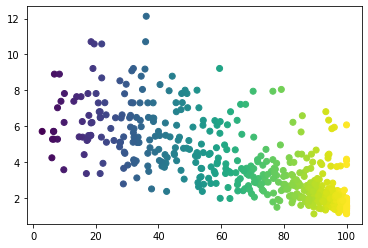

In [27]:
plt.scatter(df['AGE'],df['DIS'],c=df['AGE'])

### Exercise 2.8:
We would like to compare the median value of homes (MEDV) versus the percentage of the population of lower status (LSTAT). Use the [dat.plot.hexbin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hexbin.html?highlight=hexbin#pandas.DataFrame.plot.hexbin) method to plot a correlation between these two values in `dat`. Choose values for the arguments which effectively represents the data.

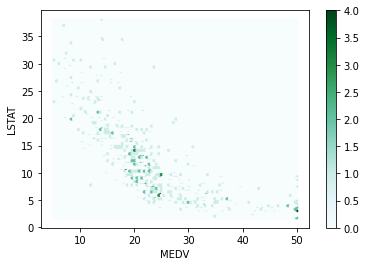

In [28]:
df.plot.hexbin('MEDV','LSTAT',sharex=False)

### Exercise 2.9:
There might be a correlation between NOX concentrations and the amount of industry per district. Plot the two variables in some way which helps show this correlation, either with one or multiple figures

(array([[32., 33.,  6.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
        [14., 29., 23.,  0., 11.,  3.,  0.,  0.,  0.,  0.],
        [ 9., 21., 48., 11.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  2., 22., 21.,  9.,  0.,  5.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  8.,  0.,  0., 29., 29.,  0., 12.],
        [ 0., 10.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., 57.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  0.,  0.]]),
 array([0.385 , 0.4336, 0.4822, 0.5308, 0.5794, 0.628 , 0.6766, 0.7252,
        0.7738, 0.8224, 0.871 ]),
 array([ 0.46 ,  3.188,  5.916,  8.644, 11.372, 14.1  , 16.828, 19.556,
        22.284, 25.012, 27.74 ]),
 <matplotlib.collections.QuadMesh at 0x7fa2ddea5cd0>)

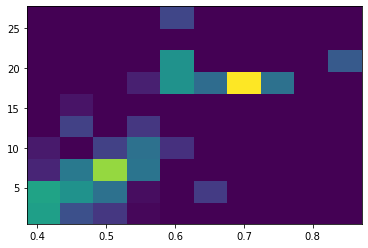

In [29]:
# plt.scatter(df['NOX'],df['INDUS'])
plt.hist2d(df['NOX'],df['INDUS'])

## Extra: California House Price Data Set

This is a set of house values and associated attributes derived from houses sold in California in 1990. We'll use this for a set of extra questions below.

The data columns are:

* longitude - A measure of how far west a house is; a higher value is farther west
* latitude - A measure of how far north a house is; a higher value is farther north
* housing_median_age - Median age of a house within a block; a lower number is a newer building
* total_rooms - Total number of rooms within a block
* total_bedrooms - Total number of bedrooms within a block
* population - Total number of people residing within a block
* households - Total number of households, a group of people residing within a home unit, for a block
* median_income - Median income for households within a block of houses (measured in tens of thousands of US Dollars)
* median_house_value - Median house value for households within a block (measured in US Dollars)
* ocean_proximity - Location of the house w.r.t ocean/sea


We will read the data in from the CSV file, remove the `ocean_proximity` field as it is categorical, remove the `total_bedrooms` field as it has missing entries, and those at the maximum value of $500,001 which indicates the actual value was above this threshold and not recorded.

In [15]:
df=pd.read_csv('california.csv')
del df['total_bedrooms'] # delete columns with this syntax
del df['ocean_proximity']

# df.median_house_value.eq(A) produces a boolean array with True for every entry equal to A
df=df[~df.median_house_value.eq (df.median_house_value.max())]

In [16]:
df

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0


### Extra 2.10:
We used Matplotlib above to plot the histogram of a field, here instead use the [DataFrame.hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) method instead to plot a useful graph of the median house values. The default number of bins isn't going to be useful, nor the default style particularly attractive, so adjust parameters to produce an insightful plot:

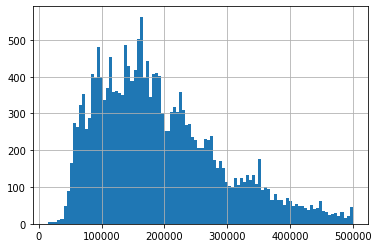

In [17]:
df.median_house_value.hist(bins=100)

### Extra 2.11:
We can view the correlation matrix with [DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr):

In [18]:
corr=df.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924139,-0.102504,0.044304,0.101061,0.055726,-0.009067,-0.046658
latitude,-0.924139,1.000000,0.006633,-0.033417,-0.113378,-0.072820,-0.078026,-0.148289
housing_median_age,-0.102504,0.006633,1.000000,-0.372009,-0.295124,-0.309438,-0.194784,0.067948
total_rooms,0.044304,-0.033417,-0.372009,1.000000,0.859590,0.921102,0.224207,0.143139
population,0.101061,-0.113378,-0.295124,0.859590,1.000000,0.908997,0.042360,0.011964
households,0.055726,-0.072820,-0.309438,0.921102,0.908997,1.000000,0.046068,0.094894
median_income,-0.009067,-0.078026,-0.194784,0.224207,0.042360,0.046068,1.000000,0.642611
median_house_value,-0.046658,-0.148289,0.067948,0.143139,0.011964,0.094894,0.642611,1.000000


Without colour this is hard to grasp which members are correlated with what. Using the [DataFrame.style](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.style.html#pandas.DataFrame.style) attribute you can build a HTML representation of the DataFrame object. Methods are given for the [Styler](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.html) object this produces, see what you can do with them to add colour or other styling to our correlation matrix:

In [19]:
corr.style.background_gradient(cmap='viridis')

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924139,-0.102504,0.044304,0.101061,0.055726,-0.009067,-0.046658
latitude,-0.924139,1.000000,0.006633,-0.033417,-0.113378,-0.072820,-0.078026,-0.148289
housing_median_age,-0.102504,0.006633,1.000000,-0.372009,-0.295124,-0.309438,-0.194784,0.067948
total_rooms,0.044304,-0.033417,-0.372009,1.000000,0.859590,0.921102,0.224207,0.143139
population,0.101061,-0.113378,-0.295124,0.859590,1.000000,0.908997,0.042360,0.011964
households,0.055726,-0.072820,-0.309438,0.921102,0.908997,1.000000,0.046068,0.094894
median_income,-0.009067,-0.078026,-0.194784,0.224207,0.042360,0.046068,1.000000,0.642611
median_house_value,-0.046658,-0.148289,0.067948,0.143139,0.011964,0.094894,0.642611,1.000000


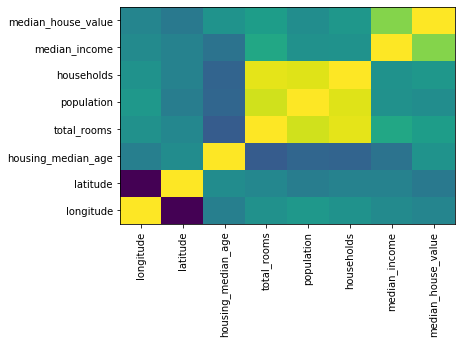

In [20]:
# alternative in Matplotlib:
plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index)), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns)), corr.columns, rotation='vertical')
plt.show()

A map of California was included with the materials:

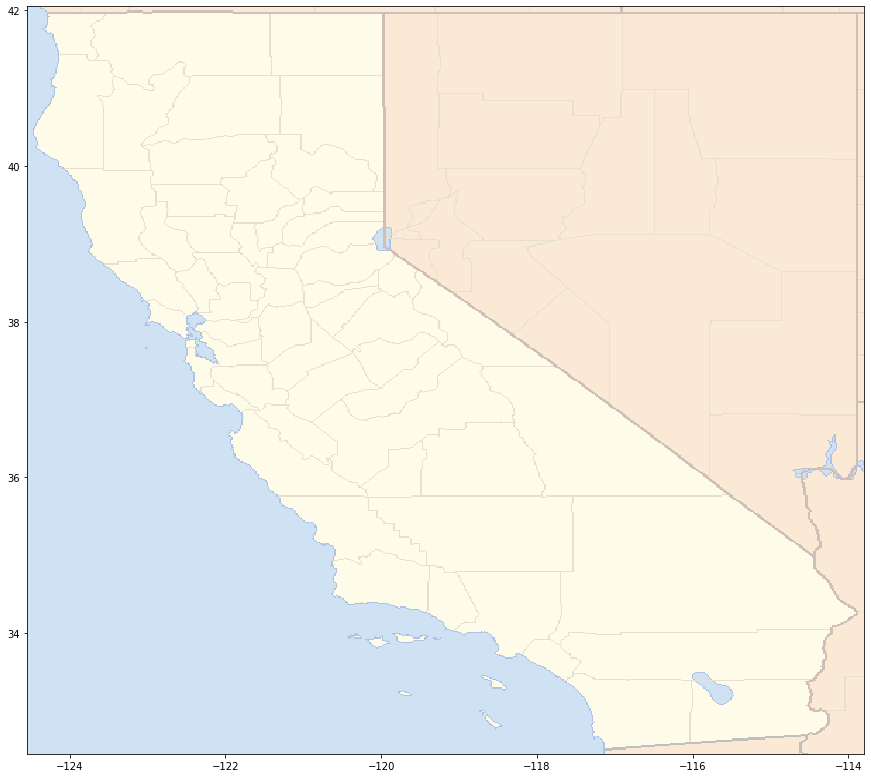

In [21]:
cali=plt.imread('california.png')

plt.figure(figsize=(15,15))
# the extent property represents the lat/long area the map covers
plt.imshow(cali, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

### Extra 2.12:
Plot each house with the map using multiple Matplotlib calls and colour the markers by median house value. Be sure to choose an appropriate marker, size, and colour map to display the data effectively:

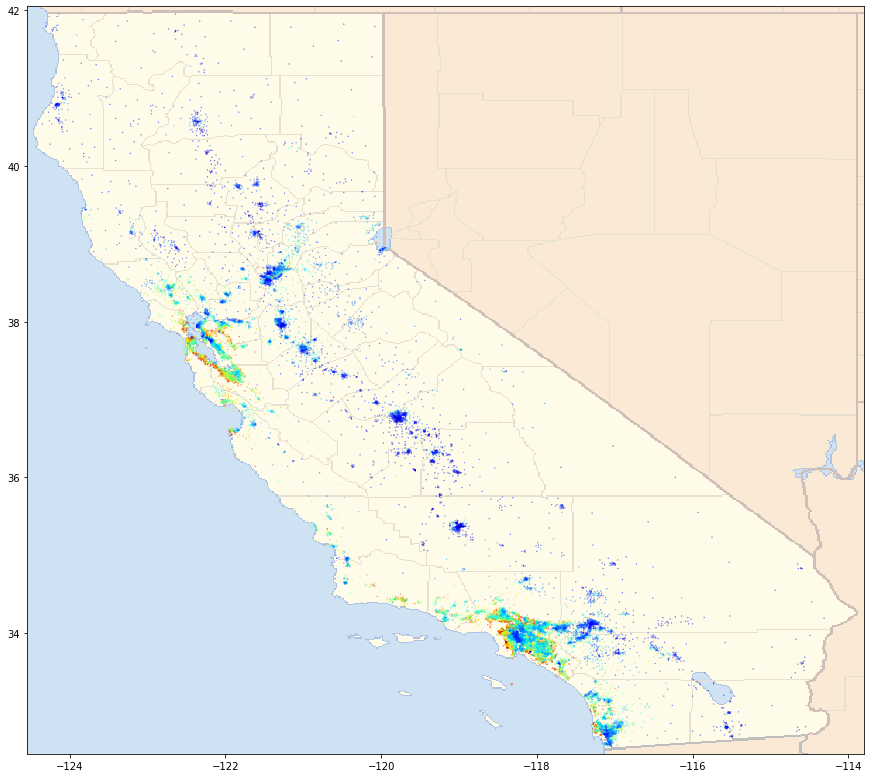

In [22]:
plt.figure(figsize=(15,15))
plt.scatter(df['longitude'],df['latitude'],c=df['median_house_value'],marker='.',cmap='jet',s=0.25)
plt.imshow(cali, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

### Extra 2.13:
Reload the data from the CSV file and don't discard the `ocean_proximity` column. Plot each house on the map with a distinct colour for each category:

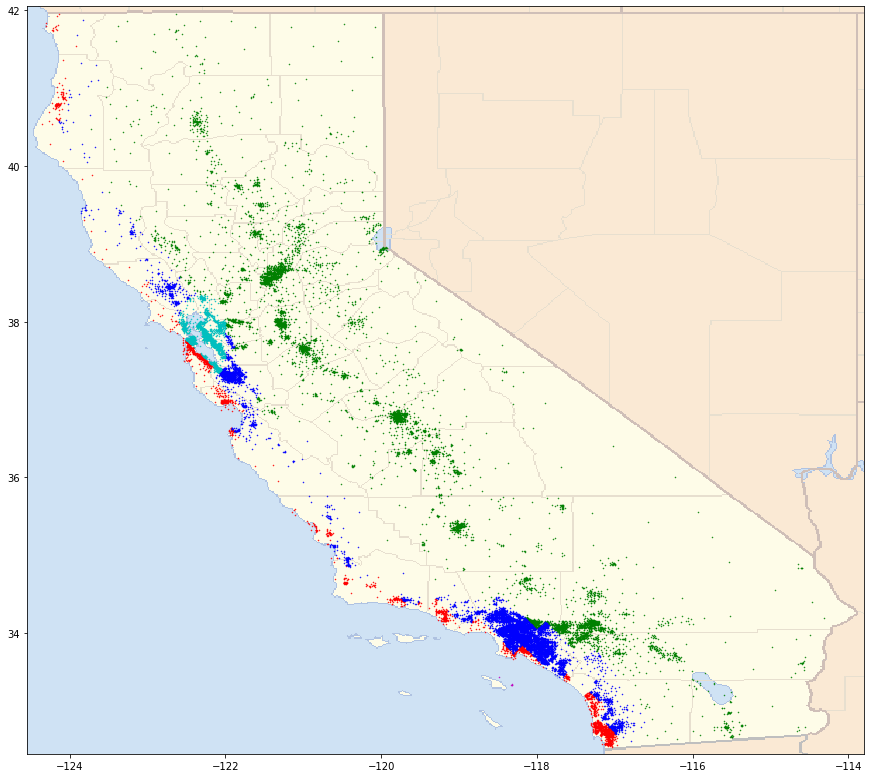

In [23]:
df=pd.read_csv('california.csv')

cats=set(df.ocean_proximity)
colours='rgbcm'

plt.figure(figsize=(15,15))
plt.imshow(cali, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

# better way maybe with a computed colour array instead?
for cat,col in zip(cats,colours):
    df_cat=df[df.ocean_proximity==cat]
    plt.scatter(df_cat['longitude'],df_cat['latitude'],c=col,marker='.',cmap='jet',s=1)